# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 2])

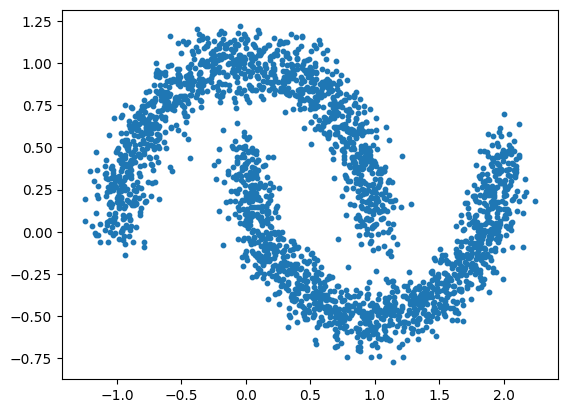

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [4]:
# initialize the LAM class
LAM = LAMINAR.LAMINAR(data, epochs=250, k_neighbours=25, hyperparameters={'learning_rate': 5e-3})

LAM.p_value()

Epoch 53 | Loss: 1.1548:  21%|██        | 52/250 [04:19<16:27,  4.99s/it]


Early stopping at epoch 53
Shapiro-Wilk p-value:	2.2839945147039276e-05


2.2839945147039276e-05

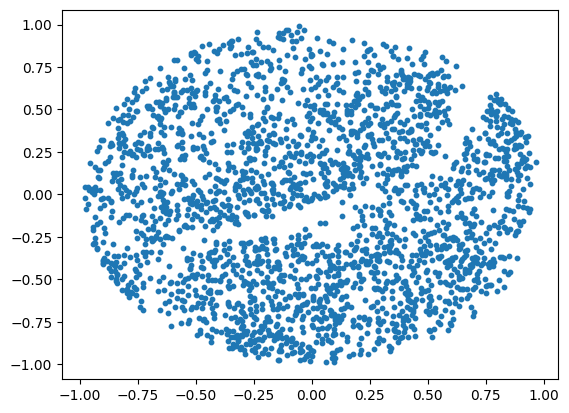

In [5]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=10);

In [6]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0, 1868, 1741, 1806, 1147, 1538, 2145, 2429, 1433,  800, 2248,
         2029, 1286, 1885,  257, 1733, 1113,  834,  120, 2220,  377, 1017,
          728, 1181, 2360], dtype=int64)],
 [array([0.00000000e+00, 4.41038283e-05, 3.01185413e-04, 4.23943071e-04,
         4.70617262e-04, 5.07632445e-04, 5.25264535e-04, 5.62707195e-04,
         6.84859406e-04, 7.16804585e-04, 7.37261973e-04, 9.54241812e-04,
         9.67028172e-04, 9.77360760e-04, 1.08017908e-03, 1.08630850e-03,
         1.09765460e-03, 1.13463224e-03, 1.14779256e-03, 1.16854176e-03,
         1.20518124e-03, 1.23845015e-03, 1.29456903e-03, 1.33854325e-03,
         1.35909693e-03])])

In [7]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0, 1868, 1741, 1806, 1147], dtype=int64),
  array([   2, 2154,  874,   49, 1325], dtype=int64),
  array([   5, 1850, 1046, 1585,  160], dtype=int64)],
 [array([0.00000000e+00, 4.41038283e-05, 3.01185413e-04, 4.23943071e-04,
         4.70617262e-04]),
  array([0.        , 0.00037261, 0.00052346, 0.00056607, 0.00060619]),
  array([0.        , 0.00033742, 0.00041782, 0.00047267, 0.00050645])])

In [8]:
# calculate the distance between the points 0 and 5
dist, path = LAM.distance(0, 5, return_path=True)
print(dist)

0.010344377980800346


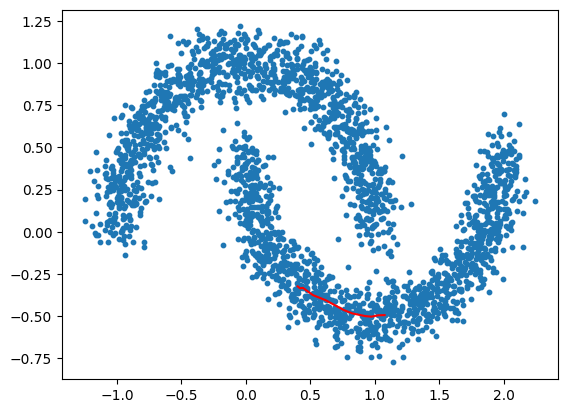

In [9]:
#plot data, and the shortest path between the points 0 and 5
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(X[path, 0], X[path, 1], 'r')
plt.show()

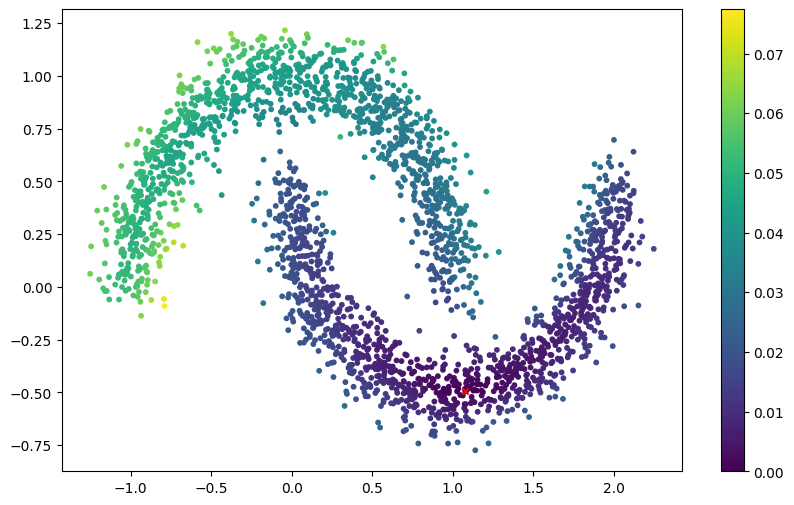

In [10]:
# calculate the distance to all points from the point 0 and plot

start_point = 0

dist = LAM.distance(start_point)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[start_point, 0], X[start_point, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()
